In [3]:
import os
import subprocess
from glob import glob
import math
from tqdm import tqdm
import pprint
import pandas as pd
import nibabel as nib
import numpy as np
from scipy.stats import pearsonr
from skimage import exposure
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

In [12]:
class NiftiManager:
    def __init__(self) -> None:
        pass

    def load_nifti(self, file_path):
        '''Loads the NIfTI image and access the image data as a Numpy array.'''
        nii_image = nib.load(file_path)
        data_array = nii_image.get_fdata()

        return data_array, nii_image

    def show_nifti(self, file_data, title, slice=25):
        '''Displays a single slice from the nifti volume (change the slice index as needed).'''
        plt.imshow(file_data[:, :, slice], cmap='gray')
        plt.title(title)
        plt.colorbar()
        plt.show()

    def show_label_seg_nifti(self, label, seg, subject_id, slice=25):
        '''Displays both segmentation and ground truth labels as passed to the function.'''
        plt.figure(figsize=(20, 7))
        
        plt.subplot(1, 2, 1)
        plt.imshow(label[:, :, slice], cmap='gray') 
        plt.title(f'Label Image (Subject ID={subject_id})')
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(seg[:, :, slice], cmap='gray') 
        plt.title(f'Segmentation Image (Subject ID={subject_id})')
        plt.colorbar()
        plt.show()

    def show_mean_volumes(self, mean_csf, mean_wm, mean_gm, slices=[128], export=False, filename=None):
        '''Displays the mean volumes for CSF, WM, and GM for a list of slices.'''
        num_slices = len(slices)
        
        plt.figure(figsize=(20, 7 * num_slices))

        for i, slice in enumerate(slices):
            plt.subplot(num_slices, 3, i * 3 + 1)
            plt.imshow(mean_csf[:, :, slice], cmap='gray')
            plt.title(f'Average CSF Volume - Slice {slice}')
            # plt.colorbar()
            plt.axis('off')

            plt.subplot(num_slices, 3, i * 3 + 2)
            plt.imshow(mean_wm[:, :, slice], cmap='gray')
            plt.title(f'Average WM Volume - Slice {slice}')
            # plt.colorbar()
            plt.axis('off')

            plt.subplot(num_slices, 3, i * 3 + 3)
            plt.imshow(mean_gm[:, :, slice], cmap='gray')
            plt.title(f'Average GM Volume - Slice {slice}')
            # plt.colorbar()
            plt.axis('off')

        if export and filename:
            plt.savefig(filename)
            
        plt.show()


    def show_combined_mean_volumes(self, mean_csf, mean_wm, mean_gm, slice_to_display=128, export=False, filename=None):
        # Stack the mean volumes along the fourth axis to create a single 4D array
        combined_mean_volumes = np.stack((mean_csf, mean_wm, mean_gm), axis=3)
    
        # Choose the channel you want to display (0 for CSF, 1 for WM, 2 for GM)
        channel_to_display = 0  # Adjust as needed
    
        # Display the selected channel
        plt.imshow(combined_mean_volumes[:, :, :, :][:, :, slice_to_display]) # [:, :, :, channel_to_display]
        plt.axis('off')  # Turn off axis labels
        plt.title(f'Combined Averaged Volumes at Slice {slice_to_display}')  # Add a title

        if export and filename:
            plt.savefig(filename)
            
        plt.show()

    def min_max_normalization(self, image, max_value):
        # Ensure the image is a NumPy array for efficient calculations
        image = np.array(image)
        
        # Calculate the minimum and maximum pixel values
        min_value = np.min(image)
        max_actual = np.max(image)
        
        # Perform min-max normalization
        normalized_image = (image - min_value) / (max_actual - min_value) * max_value
        
        return normalized_image

    def export_nifti(self, volume, export_path):
        '''Exports nifti volume to a given path.
        '''
        
        # Create a NIfTI image from the NumPy array
        # np.eye(4): Identity affine transformation matrix, it essentially assumes that the images are in the same orientation and position 
        # as the original images
        img = nib.Nifti1Image(volume, np.eye(4))

        # Save the NIfTI image
        nib.save(img, str(export_path))

        
NM = NiftiManager()

In [68]:
def min_max_normalization(self, image, max_value):
    # Ensure the image is a NumPy array for efficient calculations
    image = np.array(image)
    
    # Calculate the minimum and maximum pixel values
    min_value = np.min(image)
    max_actual = np.max(image)
    
    # Perform min-max normalization
    normalized_image = (image - min_value) / (max_actual - min_value) * max_value
    
    return normalized_image

def pprint_objects(*arg):
    '''Prints large and indented objects clearly.'''
    pp.pprint(arg)


In [69]:
test_path = 'test-set/testing-images'
test_labels_path = 'test-set/testing-labels'

test_volumes = sorted(glob(os.path.join(test_path, "*.nii.gz"), recursive=True))
test_labels = sorted(glob(os.path.join(test_labels_path, "*.nii.gz"), recursive=True))

pprint_objects(test_volumes)
print('')
pprint_objects(test_labels)

(   [   'test-set/testing-images\\1003.nii.gz',
        'test-set/testing-images\\1004.nii.gz',
        'test-set/testing-images\\1005.nii.gz',
        'test-set/testing-images\\1018.nii.gz',
        'test-set/testing-images\\1019.nii.gz',
        'test-set/testing-images\\1023.nii.gz',
        'test-set/testing-images\\1024.nii.gz',
        'test-set/testing-images\\1025.nii.gz',
        'test-set/testing-images\\1038.nii.gz',
        'test-set/testing-images\\1039.nii.gz',
        'test-set/testing-images\\1101.nii.gz',
        'test-set/testing-images\\1104.nii.gz',
        'test-set/testing-images\\1107.nii.gz',
        'test-set/testing-images\\1110.nii.gz',
        'test-set/testing-images\\1113.nii.gz',
        'test-set/testing-images\\1116.nii.gz',
        'test-set/testing-images\\1119.nii.gz',
        'test-set/testing-images\\1122.nii.gz',
        'test-set/testing-images\\1125.nii.gz',
        'test-set/testing-images\\1128.nii.gz'],)

(   [   'test-set/testing-labels\\100

In [10]:
test_volumes[0]

'test-set/testing-images\\1003.nii.gz'

Normalized to:  255


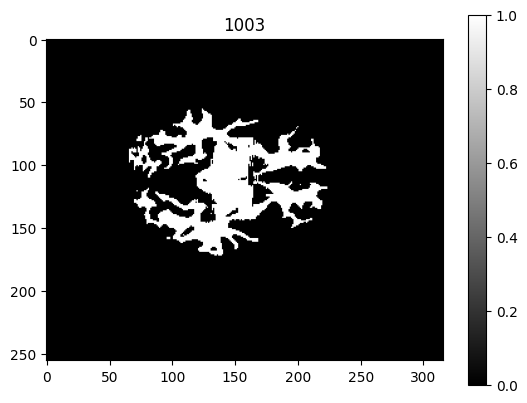

In [269]:
test_1003, _  = NM.load_nifti(test_volumes[0])
test_1003     = NM.min_max_normalization(test_1003, 255).astype('uint8')   

print("Normalized to: ", test_1003.max())

label_1003, _ = NM.load_nifti(test_labels[0])

NM.show_nifti(label_1003==2, title="1003", slice=138)

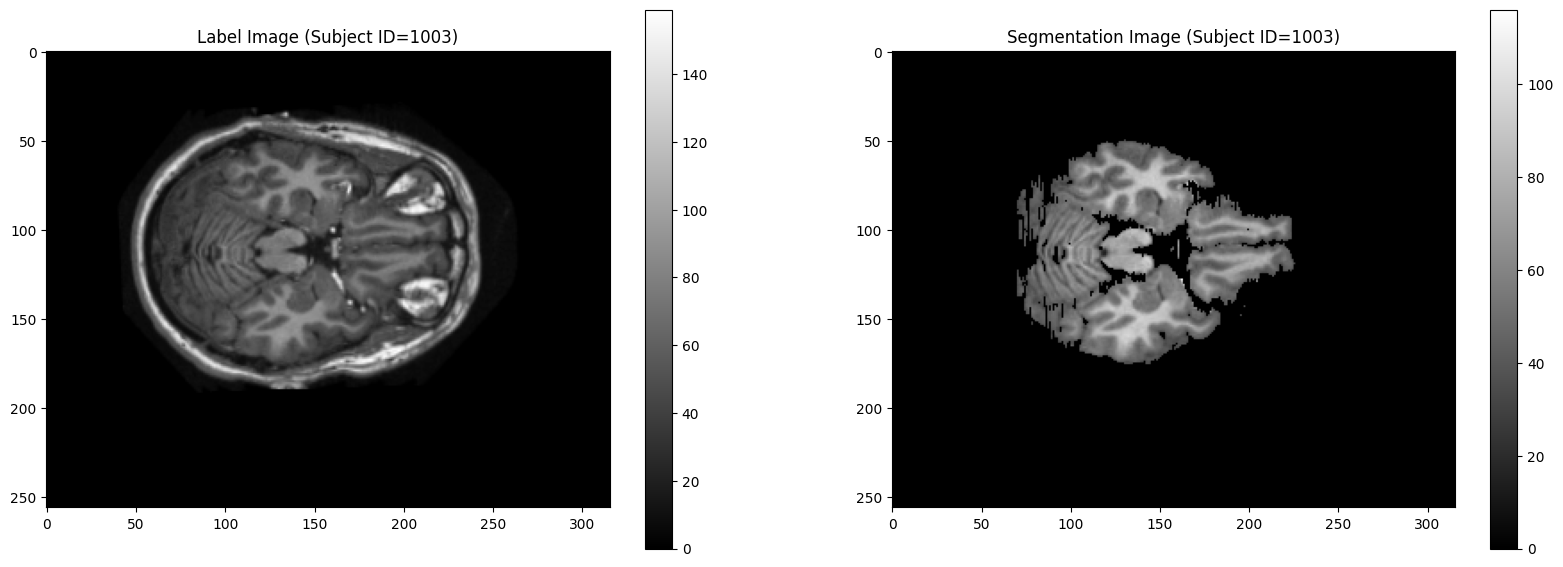

In [135]:
def skull_stripping(image, label):
    '''
    Labels from the atlas to validate:
     - bg = 0
     - csf = 1
     - wm = 2
     - gm = 3
    '''

    # convert the labels to binary form, all tissues to 1, else is 0
    labels_binary   = np.where(label == 0, 0, 1)

    # multiply the image to get only the tissues
    return np.multiply(image, labels_binary)

skull_stripped = skull_stripping(test_1003, label_1003)

NM.show_label_seg_nifti(test_1003, skull_stripped, subject_id=1003, slice=128)


In [162]:
print(np.unique(skull_stripped))
print(np.max(skull_stripped))

[  0   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 110 111 112 113 115 116 118
 121 146]
146


In [293]:
def segment_using_tissue_models(image, tissue_map_csv):
    '''
    Task (1.1) Tissue models: segmentation using just intensity information.

    Args:
        - image (np.array): a normalized [0, 255] test intensity image to segment.
        - tissue_map_csv (csv): a csf file name that contains the tissue maps probabilities 
    '''

    # read the tissue model, and exclude the first column as it refers to the bg values
    # we will replace the bg in a later step
    tissue_map_df = pd.read_csv(tissue_map_csv, header=None)
    tissue_map_array = tissue_map_df.values[:, 1:4]

    # obtain the argmax to know to which cluster each row (histogram pin - 0:255) falls into
    tissue_map_array_argmax = np.argmax(tissue_map_array, axis=1) + 1
    
    # convert bg pixels above 100 to wm
    # the threshold of 100 is observed from the probabilistic tissue map
    bg_mask = np.arange(len(tissue_map_array_argmax)) > 100
    tissue_map_array_argmax[bg_mask] = 2

    # create a black image as a template for the segmentation to fill
    segmentation_result =  np.zeros_like(image)
    img_copy_bg = (image == 0).astype(int)

    # loop through the argmax values of the tissue map
    # index represent the pixel value we want to map to its corrosponding segmentation result of the argmax
    # the value is the new label of that pixel
    for index, value in enumerate(tissue_map_array_argmax):
        # we add a condition to select the pixels that are equal to the index, and not the background as we want to preserve the background
        condition = np.logical_and(image == index, image != 0)
        
        # we update the zeros template with the label value that we obtained from argmax 
        segmentation_result[condition] = value

    return segmentation_result


tissue_map_csv = 'atlas_outputs/tissue_model_probability_data.csv'
segmentation_tissue_model = segment_using_tissue_models(skull_stripped, tissue_map_csv)

In [294]:
np.unique(segmentation_tissue_model)

array([0, 1, 2, 3])

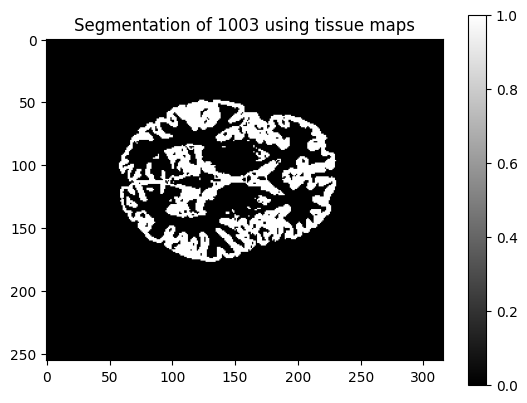

In [295]:
segmentation_tissue_model_bg  = segmentation_tissue_model == 0
segmentation_tissue_model_csf = segmentation_tissue_model == 1
segmentation_tissue_model_wm  = segmentation_tissue_model == 2
segmentation_tissue_model_gm  = segmentation_tissue_model == 3

NM.show_nifti(segmentation_tissue_model_gm, title="Segmentation of 1003 using tissue maps", slice=148)